<a href="https://colab.research.google.com/github/luciainnocenti/IncrementalLearning/blob/master/ICaRLMain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import GitHub repository

In [ ]:
import os
import logging
import sys

In [ ]:
if not os.path.isdir('./DatasetCIFAR'):
  !git clone https://github.com/luciainnocenti/IncrementalLearning.git
  !mv 'IncrementalLearning' 'DatasetCIFAR'

Cloning into 'IncrementalLearning'...
remote: Enumerating objects: 81, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 1580 (delta 44), reused 0 (delta 0), pack-reused 1499
Receiving objects: 100% (1580/1580), 1.20 MiB | 1.35 MiB/s, done.
Resolving deltas: 100% (1008/1008), done.


# Import packages

In [ ]:
from DatasetCIFAR.data_set import Dataset 
from DatasetCIFAR.data_set import Subset
from DatasetCIFAR import ResNet
from DatasetCIFAR import utils
from DatasetCIFAR import params
from DatasetCIFAR import ICaRLModel
from torchvision import models
import torch.nn as nn
import torch
import torch.optim as optim
import torchvision
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from torchvision import transforms
from torch.utils.data import DataLoader
from torch.nn import functional as F
import random
random.seed(params.SEED)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
print(params.SEED)
print(params.NUM_WORKERS)

653
4


# Define Datasets

In [ ]:
train_transformer = transforms.Compose([transforms.RandomCrop(size = 32, padding=4),
                                         transforms.RandomHorizontalFlip(),
                                         transforms.ToTensor(),
                                         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

test_transformer = transforms.Compose([transforms.ToTensor(),
                                         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [ ]:
trainDS = Dataset(train=True)
testDS = Dataset(train=False)

Extracting data/cifar-100-python.tar.gz to data
Files already downloaded and verified


In [ ]:
train_splits = trainDS.splits
test_splits = testDS.splits

# Define Network

In [ ]:
ICaRL = ResNet.resnet32(num_classes=100)
ICaRL =  ICaRL.to(params.DEVICE)

In [ ]:
exemplars = [None]*100

test_indexes =  []
accs = []

At step  0  and at epoch =  0  the loss is =  0.03090560808777809  and accuracy is =  0.1564
At step  0  and at epoch =  1  the loss is =  0.025860246270895004  and accuracy is =  0.3122
At step  0  and at epoch =  2  the loss is =  0.01707105152308941  and accuracy is =  0.435
At step  0  and at epoch =  3  the loss is =  0.023238729685544968  and accuracy is =  0.5066
At step  0  and at epoch =  4  the loss is =  0.01705314591526985  and accuracy is =  0.5498
At step  0  and at epoch =  5  the loss is =  0.02490994893014431  and accuracy is =  0.5898
At step  0  and at epoch =  6  the loss is =  0.016995780169963837  and accuracy is =  0.6234
At step  0  and at epoch =  7  the loss is =  0.015786608681082726  and accuracy is =  0.6488
At step  0  and at epoch =  8  the loss is =  0.020119864493608475  and accuracy is =  0.685
At step  0  and at epoch =  9  the loss is =  0.008716439828276634  and accuracy is =  0.698
At step  0  and at epoch =  10  the loss is =  0.011174947023391724

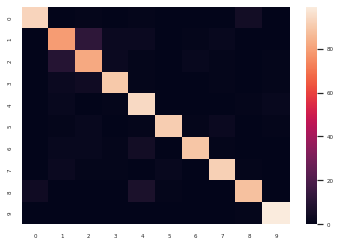

At step  10  and at epoch =  0  the loss is =  0.028366409242153168  and accuracy is =  0.3041369472182596
At step  10  and at epoch =  1  the loss is =  0.03058656118810177  and accuracy is =  0.40456490727532096
At step  10  and at epoch =  2  the loss is =  0.028254637494683266  and accuracy is =  0.4884450784593438
At step  10  and at epoch =  3  the loss is =  0.022528735920786858  and accuracy is =  0.54679029957204
At step  10  and at epoch =  4  the loss is =  0.02314004674553871  and accuracy is =  0.5723252496433666
At step  10  and at epoch =  5  the loss is =  0.023708531633019447  and accuracy is =  0.6005706134094151
At step  10  and at epoch =  6  the loss is =  0.023413117974996567  and accuracy is =  0.6159771754636234
At step  10  and at epoch =  7  the loss is =  0.02410012111067772  and accuracy is =  0.645506419400856
At step  10  and at epoch =  8  the loss is =  0.02483855001628399  and accuracy is =  0.6651925820256777
At step  10  and at epoch =  9  the loss is

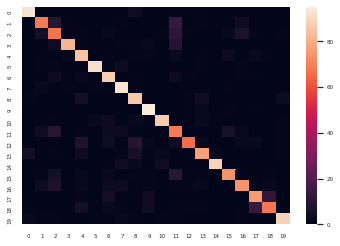

At step  20  and at epoch =  0  the loss is =  0.044499702751636505  and accuracy is =  0.27521367521367524
At step  20  and at epoch =  1  the loss is =  0.03558014705777168  and accuracy is =  0.34985754985754985
At step  20  and at epoch =  2  the loss is =  0.03488459438085556  and accuracy is =  0.43304843304843305
At step  20  and at epoch =  3  the loss is =  0.03387703746557236  and accuracy is =  0.48846153846153845
At step  20  and at epoch =  4  the loss is =  0.03554879501461983  and accuracy is =  0.5313390313390314
At step  20  and at epoch =  5  the loss is =  0.03126857429742813  and accuracy is =  0.5710826210826211
At step  20  and at epoch =  6  the loss is =  0.031395770609378815  and accuracy is =  0.5886039886039887
At step  20  and at epoch =  7  the loss is =  0.03017565980553627  and accuracy is =  0.607977207977208
At step  20  and at epoch =  8  the loss is =  0.034722700715065  and accuracy is =  0.6411680911680911
At step  20  and at epoch =  9  the loss is

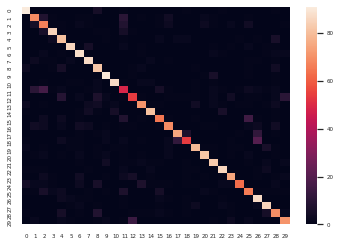

At step  30  and at epoch =  0  the loss is =  0.047485869377851486  and accuracy is =  0.2867332382310984
At step  30  and at epoch =  1  the loss is =  0.04574733227491379  and accuracy is =  0.37646219686162624
At step  30  and at epoch =  2  the loss is =  0.04059475660324097  and accuracy is =  0.44265335235378034
At step  30  and at epoch =  3  the loss is =  0.03944365680217743  and accuracy is =  0.48958630527817404
At step  30  and at epoch =  4  the loss is =  0.040769558399915695  and accuracy is =  0.5293865905848787
At step  30  and at epoch =  5  the loss is =  0.04012158140540123  and accuracy is =  0.5549215406562055
At step  30  and at epoch =  6  the loss is =  0.042844269424676895  and accuracy is =  0.5803138373751783
At step  30  and at epoch =  7  the loss is =  0.04179094359278679  and accuracy is =  0.5861626248216834
At step  30  and at epoch =  8  the loss is =  0.04047355800867081  and accuracy is =  0.6124108416547789
At step  30  and at epoch =  9  the loss

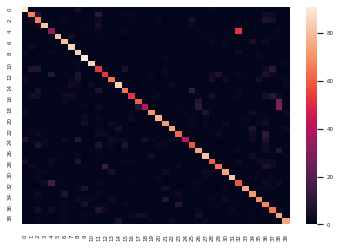

At step  40  and at epoch =  0  the loss is =  0.060169920325279236  and accuracy is =  0.2650568181818182
At step  40  and at epoch =  1  the loss is =  0.05666143447160721  and accuracy is =  0.33167613636363635
At step  40  and at epoch =  2  the loss is =  0.05305064097046852  and accuracy is =  0.3731534090909091
At step  40  and at epoch =  3  the loss is =  0.05727294832468033  and accuracy is =  0.42272727272727273
At step  40  and at epoch =  4  the loss is =  0.049758151173591614  and accuracy is =  0.45852272727272725
At step  40  and at epoch =  5  the loss is =  0.052201222628355026  and accuracy is =  0.48210227272727274
At step  40  and at epoch =  6  the loss is =  0.050882451236248016  and accuracy is =  0.5110795454545455
At step  40  and at epoch =  7  the loss is =  0.052581775933504105  and accuracy is =  0.5258522727272728
At step  40  and at epoch =  8  the loss is =  0.05020326375961304  and accuracy is =  0.5457386363636364
At step  40  and at epoch =  9  the l

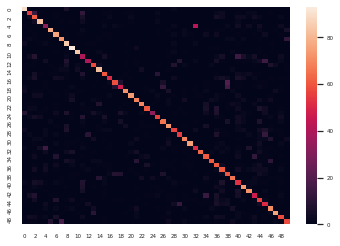

At step  50  and at epoch =  0  the loss is =  0.0831393301486969  and accuracy is =  0.2500709219858156
At step  50  and at epoch =  1  the loss is =  0.06995198875665665  and accuracy is =  0.30141843971631205
At step  50  and at epoch =  2  the loss is =  0.09400006383657455  and accuracy is =  0.3777304964539007
At step  50  and at epoch =  3  the loss is =  0.0689115971326828  and accuracy is =  0.4136170212765957
At step  50  and at epoch =  4  the loss is =  0.07107898592948914  and accuracy is =  0.43560283687943263
At step  50  and at epoch =  5  the loss is =  0.08040109276771545  and accuracy is =  0.4682269503546099
At step  50  and at epoch =  6  the loss is =  0.07730340212583542  and accuracy is =  0.49446808510638296
At step  50  and at epoch =  7  the loss is =  0.09919480234384537  and accuracy is =  0.5038297872340426
At step  50  and at epoch =  8  the loss is =  0.058443766087293625  and accuracy is =  0.49546099290780143
At step  50  and at epoch =  9  the loss is

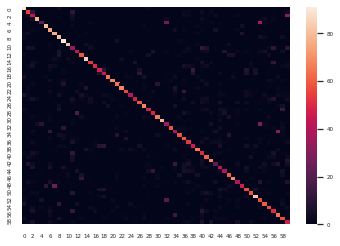

At step  60  and at epoch =  0  the loss is =  0.07279569655656815  and accuracy is =  0.23863636363636365
At step  60  and at epoch =  1  the loss is =  0.07277166843414307  and accuracy is =  0.30298295454545454
At step  60  and at epoch =  2  the loss is =  0.06845667958259583  and accuracy is =  0.35696022727272725
At step  60  and at epoch =  3  the loss is =  0.0686529204249382  and accuracy is =  0.39801136363636364
At step  60  and at epoch =  4  the loss is =  0.06606439501047134  and accuracy is =  0.42088068181818183
At step  60  and at epoch =  5  the loss is =  0.067217618227005  and accuracy is =  0.45071022727272725
At step  60  and at epoch =  6  the loss is =  0.06797261536121368  and accuracy is =  0.4629261363636364
At step  60  and at epoch =  7  the loss is =  0.0696958601474762  and accuracy is =  0.49119318181818183
At step  60  and at epoch =  8  the loss is =  0.0673186257481575  and accuracy is =  0.4941761363636364
At step  60  and at epoch =  9  the loss is 

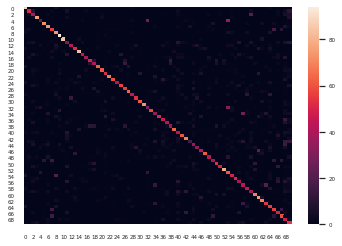

At step  70  and at epoch =  0  the loss is =  0.09032084047794342  and accuracy is =  0.2520625889046942
At step  70  and at epoch =  1  the loss is =  0.07543714344501495  and accuracy is =  0.36728307254623044
At step  70  and at epoch =  2  the loss is =  0.07683560997247696  and accuracy is =  0.4294452347083926
At step  70  and at epoch =  3  the loss is =  0.08741398900747299  and accuracy is =  0.48193456614509245
At step  70  and at epoch =  4  the loss is =  0.0777384415268898  and accuracy is =  0.5184921763869133
At step  70  and at epoch =  5  the loss is =  0.08059888333082199  and accuracy is =  0.5517780938833571
At step  70  and at epoch =  6  the loss is =  0.07884905487298965  and accuracy is =  0.5741109530583215
At step  70  and at epoch =  7  the loss is =  0.07864441722631454  and accuracy is =  0.5873399715504979
At step  70  and at epoch =  8  the loss is =  0.07603292912244797  and accuracy is =  0.6056899004267425
At step  70  and at epoch =  9  the loss is =

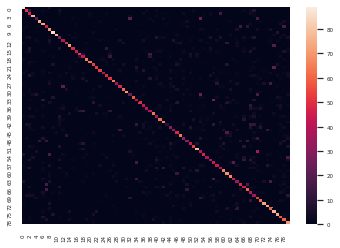

At step  80  and at epoch =  0  the loss is =  0.09435156732797623  and accuracy is =  0.26228813559322034
At step  80  and at epoch =  1  the loss is =  0.10137956589460373  and accuracy is =  0.35409604519774013
At step  80  and at epoch =  2  the loss is =  0.1017940565943718  and accuracy is =  0.40353107344632766
At step  80  and at epoch =  3  the loss is =  0.100143663585186  and accuracy is =  0.44392655367231637
At step  80  and at epoch =  4  the loss is =  0.09285052865743637  and accuracy is =  0.4703389830508475
At step  80  and at epoch =  5  the loss is =  0.10853821784257889  and accuracy is =  0.4837570621468927
At step  80  and at epoch =  6  the loss is =  0.09833651781082153  and accuracy is =  0.5100282485875707
At step  80  and at epoch =  7  the loss is =  0.09294835478067398  and accuracy is =  0.5333333333333333
At step  80  and at epoch =  8  the loss is =  0.09839897602796555  and accuracy is =  0.5501412429378532
At step  80  and at epoch =  9  the loss is =

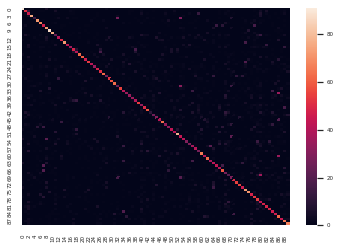

At step  90  and at epoch =  0  the loss is =  0.1102849692106247  and accuracy is =  0.25346534653465347
At step  90  and at epoch =  1  the loss is =  0.11838110536336899  and accuracy is =  0.3852899575671853
At step  90  and at epoch =  2  the loss is =  0.09780171513557434  and accuracy is =  0.43182461103253184
At step  90  and at epoch =  3  the loss is =  0.09479768574237823  and accuracy is =  0.47326732673267324
At step  90  and at epoch =  4  the loss is =  0.09133771806955338  and accuracy is =  0.4957567185289958
At step  90  and at epoch =  5  the loss is =  0.1040867492556572  and accuracy is =  0.5178217821782178
At step  90  and at epoch =  6  the loss is =  0.09194578230381012  and accuracy is =  0.5332390381895332
At step  90  and at epoch =  7  the loss is =  0.0977047011256218  and accuracy is =  0.5586987270155587
At step  90  and at epoch =  8  the loss is =  0.08776780217885971  and accuracy is =  0.5673267326732673
At step  90  and at epoch =  9  the loss is = 

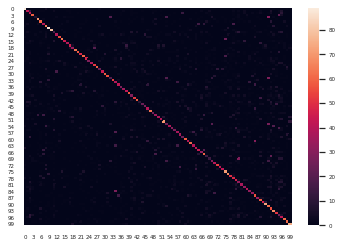

In [ ]:
for task in range(0, 100, params.TASK_SIZE):
  train_indexes = trainDS.__getIndexesGroups__(task)
  test_indexes = test_indexes + testDS.__getIndexesGroups__(task)

  train_dataset = Subset(trainDS, train_indexes, transform = train_transformer)
  test_dataset = Subset(testDS, test_indexes, transform = test_transformer)

  train_loader = DataLoader( train_dataset, num_workers=params.NUM_WORKERS, batch_size=params.BATCH_SIZE, shuffle=True)
  test_loader = DataLoader( test_dataset, num_workers=params.NUM_WORKERS, batch_size=params.BATCH_SIZE , shuffle=True )
  
  ICaRL, exemplars = ICaRLModel.incrementalTrain(task, trainDS, ICaRL, exemplars, train_transformer)

  col = []
  for i,x in enumerate( train_splits[ :int(task/10) + 1]) : 
    v = np.array(x)
    col = np.concatenate( (col,v), axis = None)
    col = col.astype(int)
  mean = None
  total = 0.0
  running_corrects = 0.0
  for img, lbl, _ in train_loader:
      img = img.float().to(params.DEVICE)
      preds, mean = ICaRLModel.classify(img, exemplars, ICaRL, task, trainDS, mean)
      preds = preds.to(params.DEVICE)
      labels = utils.mapFunction(lbl, col).to(params.DEVICE)

      total += len(lbl)
      running_corrects += torch.sum(preds == labels.data).data.item()

  accuracy = float(running_corrects/total)
  print(f'task: {task}', f'train accuracy = {accuracy}')
  accs.append(accuracy)

  total = 0.0
  running_corrects = 0.0
  tot_preds = []
  tot_lab = []
  for img, lbl, _ in test_loader:
      img = img.float().to(params.DEVICE)
      preds, _ = ICaRLModel.classify(img, exemplars, ICaRL, task, trainDS, mean)
      preds = preds.to(params.DEVICE)
      labels = utils.mapFunction(lbl, col).to(params.DEVICE)

      tot_preds = np.concatenate( ( tot_preds, preds.data.cpu().numpy() ) )
      tot_lab = np.concatenate( (tot_lab, labels.data.cpu().numpy()  ) )

      total += len(lbl)
      running_corrects += torch.sum(preds == labels.data).data.item()

  accuracy = float(running_corrects/total)
  print(f'task: {task}', f'test accuracy = {accuracy}')
  cf = confusion_matrix(tot_lab, tot_preds)
  df_cm = pd.DataFrame(cf, range(task + params.TASK_SIZE), range(task + params.TASK_SIZE))
  sn.set(font_scale = .5) # for label size
  sn.heatmap(df_cm, annot=False)
  plt.show()